## Loading Data & Exploratory Data Analysis

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [4]:
df = pd.read_csv('Ecommerce data.csv', index_col=0)

In [6]:
df = df.drop(columns=['logtarg'],axis=1)

In [10]:
df.describe().transpose().head(4)

,count,mean,std,min,25%,50%,75%,max
r,33713.0,508.427254,542.440039,0.0,117.000000,293.000000,712.000000,2460.0
f,33713.0,5.820603,7.008049,0.0,1.000000,3.000000,7.000000,118.0
m,33713.0,251.924325,3929.929826,0.0,39.899994,102.629944,247.297485,532892.0
tof,33713.0,1296.088186,818.976321,0.0,536.000000,1311.000000,2132.000000,2462.0


Text(0.5, 1.0, 'Recency')

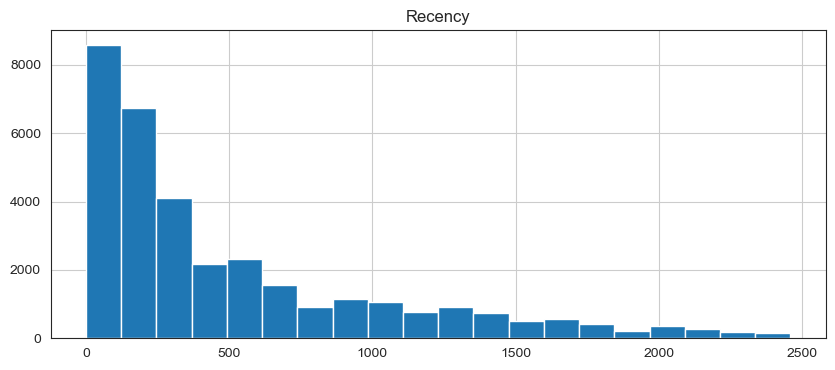

In [12]:
plt.figure(figsize=(10,4))
df['r'].hist(bins=20)
plt.title('Recency')

Text(0.5, 1.0, 'Frequency')

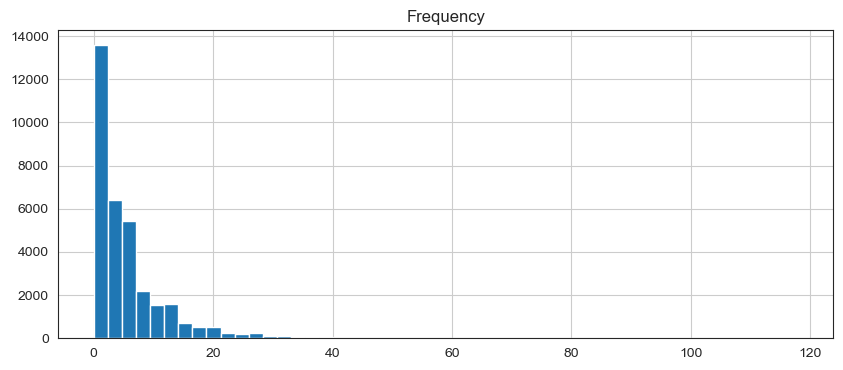

In [14]:
plt.figure(figsize=(10,4))
df['f'].hist(bins=50)
plt.title('Frequency')

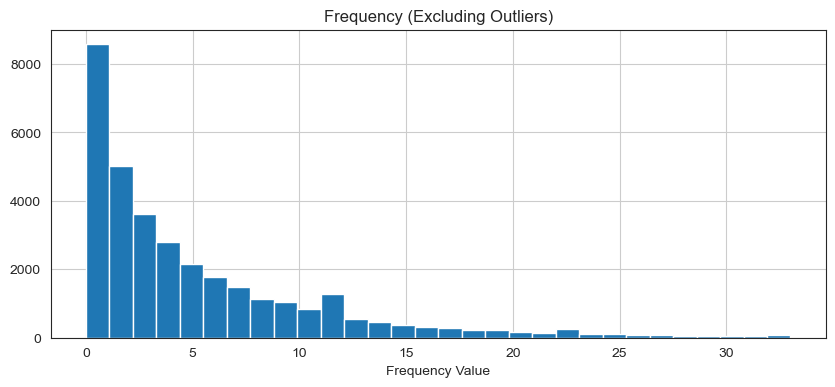

In [16]:
df_cleaned = df[(df['f'] < df['f'].quantile(0.99))]

plt.figure(figsize=(10, 4))
df_cleaned['f'].hist(bins=30)
plt.title('Frequency (Excluding Outliers)')
plt.xlabel('Frequency Value')
plt.show()

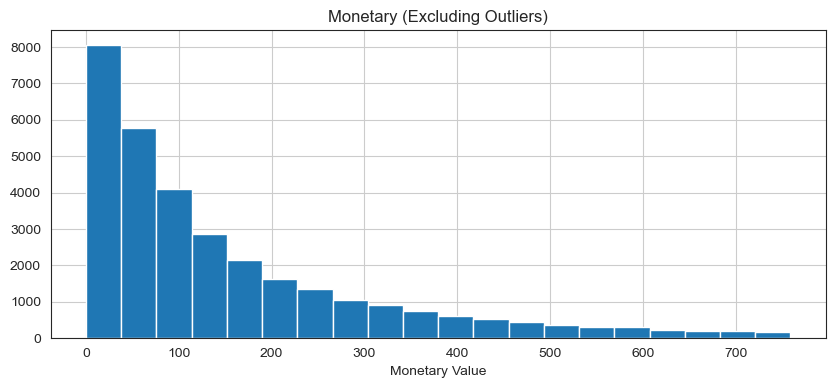

In [20]:
df_cleaned = df[df['m'] < df['m'].quantile(0.95)]  # exclude top 5% of values
plt.figure(figsize=(10, 4))
df_cleaned['m'].hist(bins=20)
plt.title('Monetary (Excluding Outliers)')
plt.xlabel('Monetary Value')
plt.show()

Text(0.5, 1.0, 'Time on File')

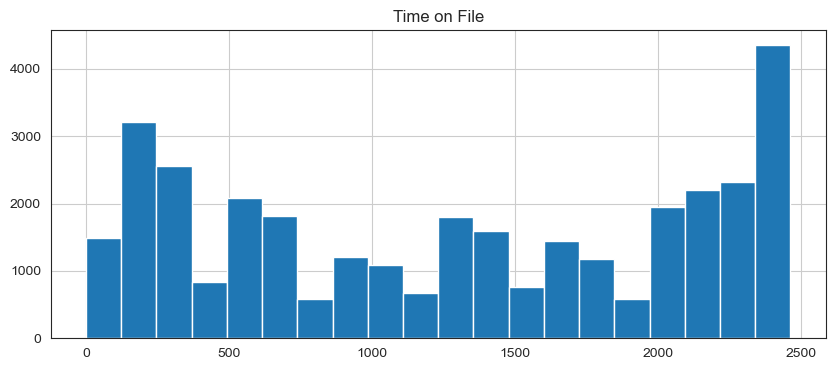

In [22]:
plt.figure(figsize=(10,4))
df['tof'].hist(bins=20)
plt.title('Time on File')

In [24]:
df.info() #No missing values

<class 'pandas.core.frame.DataFrame'>
Index: 33713 entries, 914 to 16252071
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   r                 33713 non-null  int64  
 1   f                 33713 non-null  int64  
 2   m                 33713 non-null  float64
 3   tof               33713 non-null  int64  
 4   Ffiction1         33713 non-null  int64  
 5   Fclassics3        33713 non-null  int64  
 6   Fcartoons5        33713 non-null  int64  
 7   Flegends6         33713 non-null  int64  
 8   Fphilosophy7      33713 non-null  int64  
 9   Freligion8        33713 non-null  int64  
 10  Fpsychology9      33713 non-null  int64  
 11  Flinguistics10    33713 non-null  int64  
 12  Fart12            33713 non-null  int64  
 13  Fmusic14          33713 non-null  int64  
 14  Ffacsimile17      33713 non-null  int64  
 15  Fhistory19        33713 non-null  int64  
 16  Fconthist20       33713 non-null  int64 

In [26]:
f_columns = [
    'Ffiction1', 'Fclassics3', 'Fcartoons5', 'Flegends6', 'Fphilosophy7', 'Freligion8', 
    'Fpsychology9', 'Flinguistics10', 'Fart12', 'Fmusic14', 'Ffacsimile17', 'Fhistory19', 
    'Fconthist20', 'Feconomy21', 'Fpolitics22', 'Fscience23', 'Fcompsci26', 'Frailroads27', 
    'Fmaps30', 'Ftravelguides31', 'Fhealth35', 'Fcooking36', 'Flearning37', 'FGamesRiddles38', 
    'Fsports39', 'Fhobby40', 'Fnature41', 'Fencyclopaedia44', 'Fvideos50', 'Fnonbooks99'
]

m_columns = [
    'Mfiction1', 'Mclassics3', 'Mcartoons5', 'Mlegends6', 'Mphilosophy7', 'Mreligion8', 
    'Mpsychology9', 'Mlinguistics10', 'Mart12', 'Mmusic14', 'Mfacsimile17', 'Mhistory19', 
    'Mconthist20', 'Meconomy21', 'Mpolitics22', 'Mscience23', 'Mcompsci26', 'Mrailroads27', 
    'Mmaps30', 'Mtravelguides31', 'Mhealth35', 'Mcooking36', 'Mlearning37', 'MGamesRiddles38', 
    'Msports39', 'Mhobby40', 'Mnature41', 'Mencyclopaedia44', 'Mvideos50', 'Mnonbooks99'
]

In [28]:
f_sums = df[f_columns].sum()
m_sums = df[m_columns].sum()

In [30]:
sorted_f_sums = f_sums.sort_values(ascending=False)
sorted_m_sums = m_sums.sort_values(ascending=False)

In [32]:
top_10_f_categories = sorted_f_sums.head(10)
top_10_m_categories = sorted_m_sums.head(10)

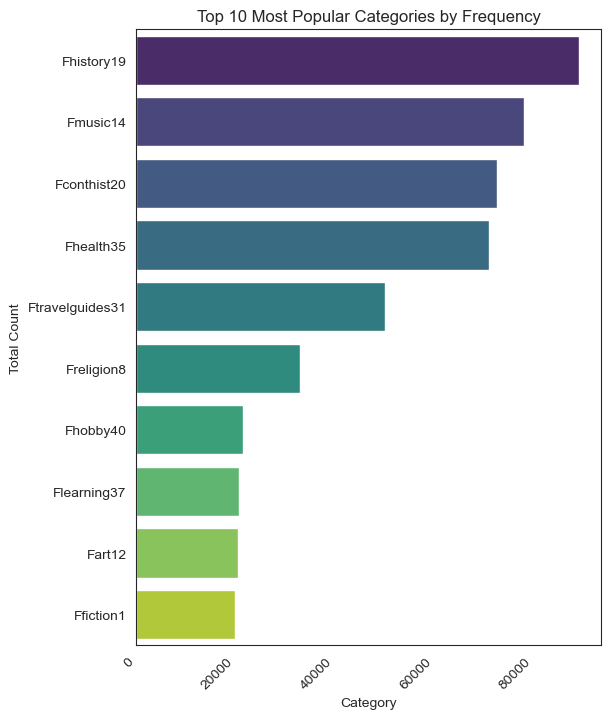

In [34]:
plt.figure(figsize=(6,8))
sns.barplot(y=top_10_f_categories.index, x=top_10_f_categories.values, palette='viridis')
plt.title('Top 10 Most Popular Categories by Frequency')
plt.xlabel('Category')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')
plt.show()

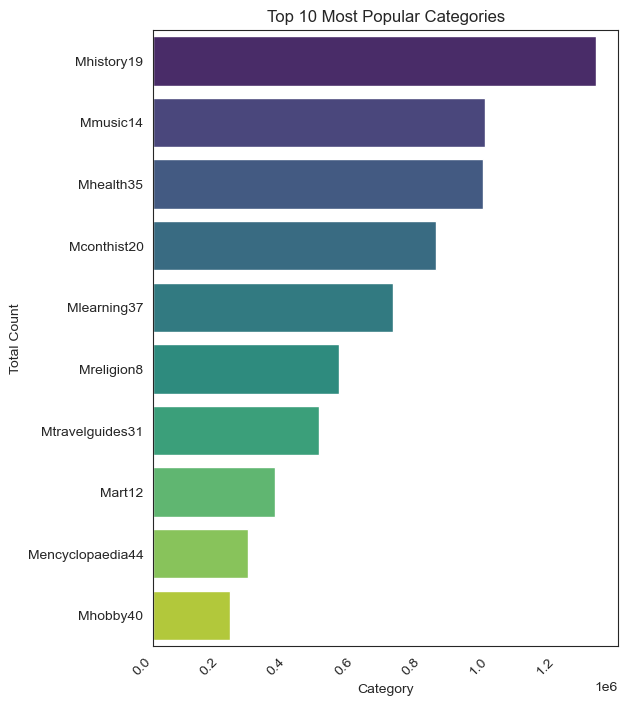

In [36]:
plt.figure(figsize=(6,8))
sns.barplot(y=top_10_m_categories.index, x=top_10_m_categories.values, palette='viridis')
plt.title('Top 10 Most Popular Categories')
plt.xlabel('Category')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [38]:
bins = [0, 31, 90, 180, 365, float('inf')]  # The bin edges
labels = ['Less than 1 month', '31-90 days', '90-180 days', '180-365 days', 'More than one year']  # Labels for each bin

# Create a new column that categorizes the values in 'r' based on the bins
df['Recency Group'] = pd.cut(df['r'], bins=bins, labels=labels, right=False)

# Calculate the count of each group and its percentage of the total
recency_counts = df['Recency Group'].value_counts()
recency_percentages = df['Recency Group'].value_counts(normalize=True) * 100  # Multiply by 100 to get percentages

# Combine both count and percentage into one DataFrame
result = pd.DataFrame({
    'Count': recency_counts,
    'Percentage': recency_percentages
})

# Display the result
print(result)

                    Count  Percentage
Recency Group                        
More than one year  14370   42.624507
180-365 days         7625   22.617388
90-180 days          4442   13.175926
31-90 days           4218   12.511494
Less than 1 month    3058    9.070685


In [40]:
bins = [0, 5, 10, 15, 20, 25, float('inf')]  # The bin edges (adjust as necessary)
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', 'More than 25']  # Labels for each bin

# Create a new column that categorizes the values in 'f' based on the bins
df['Frequency Group'] = pd.cut(df['f'], bins=bins, labels=labels, right=False)

# Calculate the count of each group and its percentage of the total
frequency_counts = df['Frequency Group'].value_counts()
frequency_percentages = df['Frequency Group'].value_counts(normalize=True) * 100  # Multiply by 100 to get percentages

# Combine both count and percentage into one DataFrame
result = pd.DataFrame({
    'Count': frequency_counts,
    'Percentage': frequency_percentages
})

# Display the result
print(result)

                 Count  Percentage
Frequency Group                   
0-5              20010   59.353958
6-10              7606   22.561030
11-15             3114    9.236793
16-20             1436    4.259484
More than 25       900    2.669593
21-25              647    1.919141


## K Means Clustering

In [50]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.simplefilter("ignore")
# Load your dataset
file_path = 'Ecommerce data.csv' 
data = pd.read_csv(file_path)

# Filter out rows where 'm' is greater than 100k (outlier removal)
filtered_data = data[data['m'] <= 100000]

# Considering only 'r', 'f', and 'm' for clustering
rfm_data_filtered = filtered_data[['r', 'f', 'm', 'tof']]

# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
rfm_scaled_filtered = scaler.fit_transform(rfm_data_filtered)




In [51]:
rfm_scaled_filtered


array([[7.88617886e-02, 5.93220339e-02, 1.71609977e-02, 6.91714054e-01],
       [1.21951220e-03, 1.18644068e-01, 1.98063569e-02, 9.60194963e-01],
       [6.05284553e-01, 1.27118644e-01, 2.27793692e-02, 9.63038180e-01],
       ...,
       [2.03252033e-03, 8.47457627e-03, 1.23503072e-03, 2.03086921e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.13008130e-04, 8.47457627e-03, 2.66379046e-04, 8.12347685e-04]])

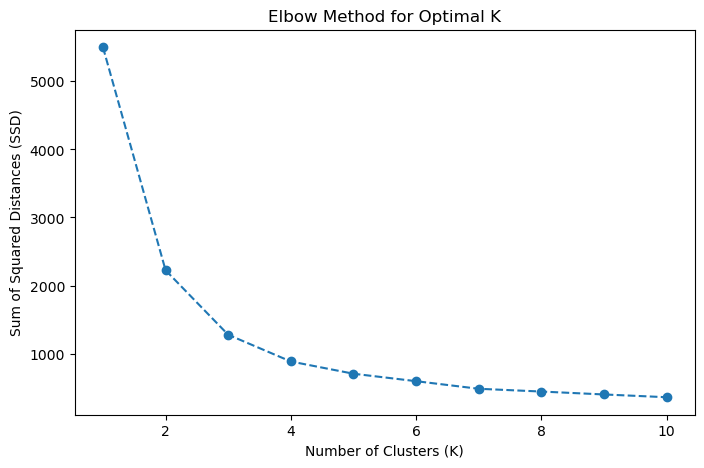

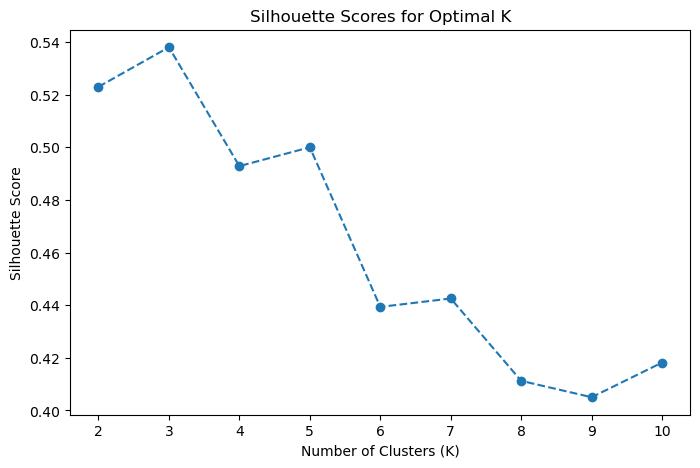

In [54]:
# Step 1: Elbow Method to determine optimal K
ssd = []  # Sum of squared distances for each K
K_range = range(1, 11)  # Test K from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_filtered)
    ssd.append(kmeans.inertia_)  # Append the inertia (SSD) for each K
    
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, ssd, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.show()


# Step 2: Silhouette Scores to further validate the optimal K
silhouette_scores = []
for k in range(2, 11):  # Silhouette is not defined for K=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled_filtered)
    silhouette_scores.append(silhouette_score(rfm_scaled_filtered, labels))

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


In [55]:
# Step 3: Choose the optimal K (from the elbow method or silhouette score)
optimal_k = 4  # Replace with the chosen K based on the plots

# Final KMeans clustering with the chosen optimal K
kmeans_filtered = KMeans(n_clusters=optimal_k, random_state=42)
clusters_filtered = kmeans_filtered.fit_predict(rfm_scaled_filtered)

# Add the cluster information to the filtered dataset
filtered_data['Cluster'] = clusters_filtered


In [56]:
filtered_data

,id,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,...,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99,Unnamed: 65,Unnamed: 66,Cluster
0,914,194,7,318.894775,1703,1,0,1,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,2
1,957,3,14,368.052246,2364,1,0,2,0,0,...,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0,NaN,NaN,2
2,1406,1489,15,423.298340,2371,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,0
3,1414,155,4,71.217041,1290,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,3
4,1546,194,6,442.638184,2188,0,0,1,0,3,...,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33708,16061594,6,1,0.000000,6,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,1
33709,16062701,4,1,0.000000,4,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,1
33710,16062981,5,1,22.949997,5,0,0,3,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,1
33711,16063490,0,0,0.000000,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,1


In [57]:
# Step 4: Analyze Cluster Centers
cluster_centers = scaler.inverse_transform(kmeans_filtered.cluster_centers_)
clusters_summary = pd.DataFrame(cluster_centers, columns=['r', 'f', 'm', 'tof'])
clusters_summary['Cluster'] = clusters_summary.index

# Count the number of records in each cluster
cluster_counts = filtered_data['Cluster'].value_counts().sort_index()

# Display cluster counts and centers
print("Cluster Counts:")
print(cluster_counts)
print("\nCluster Centers:")
print(clusters_summary)


Cluster Counts:
Cluster
0     5520
1    11941
2     8798
3     7450
Name: count, dtype: int64

Cluster Centers:
             r          f           m          tof  Cluster
0  1527.405737   3.424860  135.569755  2003.159120        0
1   202.956832   2.470746   81.809628   357.765465        1
2   285.261902  12.379275  462.170609  2193.331099        2
3   503.289845   5.212777  185.802249  1212.308541        3


| **Cluster**          | **Name**                | **Goal**                 | **Message**                                   | **Discount Strategy**      | **Suggested Items**                           |
|-----------------------|-------------------------|--------------------------|----------------------------------------------|-----------------------------|-----------------------------------------------|
| **Cluster 1**         | "New & Low Spenders"   | Increase engagement      | "Welcome! Exclusive offers to get started." | First-time discount or bundles | Best-selling, affordable items               |
| **Cluster 2**         | "VIP"   | Increase basket size     | "Curated picks based on your interests!"    | Tiered discounts            | Frequently co-purchased items                |
| **Cluster 0**         | "Dormant Buyers"       | Reactivate customers     | "We miss you! Here's something special."    | Deep discounts (30%)        | Popular or heavily discounted items          |
| **Cluster 3**         | "Moderates"  | Boost frequency & spend  | "Your favorites are back!"                  | Personalized bundles         | Related products from purchase history       |


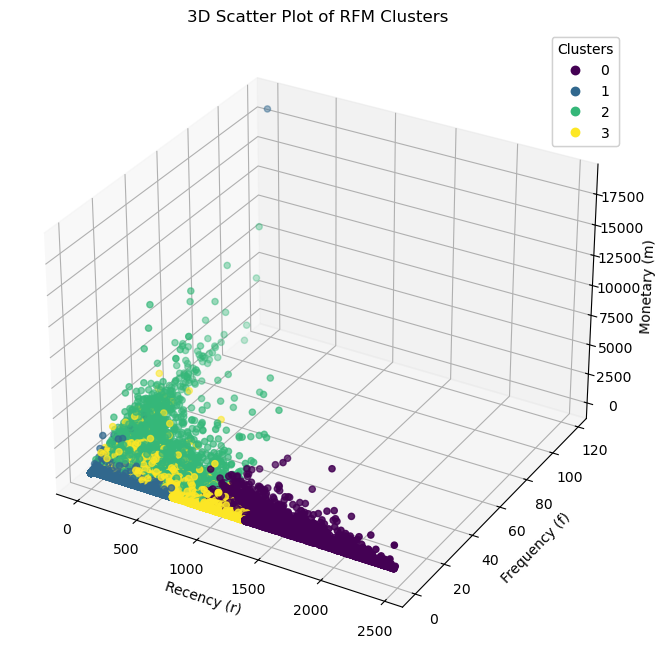

In [58]:
# Step 5: Plotting the clusters in a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(filtered_data['r'], filtered_data['f'], filtered_data['m'], 
                     c=filtered_data['Cluster'], cmap='viridis', marker='o')

# Adding labels and title
ax.set_title('3D Scatter Plot of RFM Clusters')
ax.set_xlabel('Recency (r)')
ax.set_ylabel('Frequency (f)')
ax.set_zlabel('Monetary (m)')

# Adding legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

In [59]:
def calculate_category_ranking(data, frequency_weight=0.9, monetary_weight=0.1):
    """
    Calculate category ranking for each group based on customizable weights for frequency and monetary values.

    Parameters:
        data (pd.DataFrame): Input data with columns named F___ and M___, where ___ is the unique category name.
        frequency_weight (float): Weight assigned to frequency. Must be between 0 and 1.
        monetary_weight (float): Weight assigned to monetary value. Must be between 0 and 1.

    Returns:
        pd.DataFrame: Ranking of categories for each group based on weighted scores.
    """
    # Validate weights
    if frequency_weight + monetary_weight != 1:
        raise ValueError("The sum of frequency_weight and monetary_weight must be 1.")
    
    # Extract column names for frequency and monetary
    frequency_columns = [col for col in data.columns if col.startswith('F')]
    monetary_columns = [col for col in data.columns if col.startswith('M')]
    
    # Ensure categories match between frequency and monetary columns
    categories = [col[1:] for col in frequency_columns if f'M{col[1:]}' in monetary_columns]
    
    # Group data by cluster
    grouped_data = data.groupby('Cluster')
    print(grouped_data)
    # Initialize a list to store rankings
    rankings = []
    
    # Loop through each group
    for cluster, group in grouped_data:
        category_scores = {}
        # Calculate weighted scores for each category
        for category in categories:
            freq_sum = group[f'F{category}'].sum()
            mon_sum = group[f'M{category}'].sum()
            score = (frequency_weight * freq_sum) + (monetary_weight * mon_sum)
            category_scores[category] = score
        
        # Sort categories by score
        sorted_categories = sorted(category_scores.items(), key=lambda x: x[1], reverse=True)
        rankings.append({'Cluster': cluster, 'Category Ranking': sorted_categories})
    
    # Convert rankings to a DataFrame for easier interpretation
    ranking_df = pd.DataFrame(rankings)
    
    return ranking_df

# Example usage:
# Assuming `df` is your DataFrame with F___ and M___ columns and a "Cluster" column
# ranking = calculate_category_ranking(df, frequency_weight=0.7, monetary_weight=0.3)
# tools.display_dataframe_to_user(name="Category Ranking by Cluster", dataframe=ranking)



In [60]:
# cluster 0: Engagement
ranking_df = calculate_category_ranking(filtered_data, frequency_weight=0.95, monetary_weight=0.05)
ranking_df

,Cluster,Category Ranking
0,0,"[(history19, 15546.24801306245), (health35, 85..."
1,1,"[(music14, 26195.1423583791), (conthist20, 188..."
2,2,"[(history19, 91621.32018583553), (conthist20, ..."
3,3,"[(music14, 28095.31440617085), (history19, 259..."


In [61]:
# cluster 1: Increase basket size
ranking_df = calculate_category_ranking(filtered_data, frequency_weight=0.4, monetary_weight=0.6)
ranking_df

,Cluster,Category Ranking
0,0,"[(history19, 87719.97615674938), (conthist20, ..."
1,1,"[(music14, 98510.70830054919), (history19, 943..."
2,2,"[(history19, 499306.8422300265), (conthist20, ..."
3,3,"[(history19, 144476.39515069738), (music14, 12..."


In [ ]:
# cluster 2: Reactivate customers
ranking_df = calculate_category_ranking(filtered_data, frequency_weight=0.4, monetary_weight=0.6)
ranking_df

In [ ]:
# cluster 3: Boost frequency & spend
ranking_df = calculate_category_ranking(filtered_data, frequency_weight=0.4, monetary_weight=0.6)
ranking_df

In [130]:
ranking_df['Category Ranking']

0    [(music14, 46015.3496474462), (history19, 3863...
1    [(history19, 202526.24808838402), (conthist20,...
2    [(history19, 35009.2814931668), (conthist20, 1...
3    [(history19, 58610.23803162901), (music14, 540...
Name: Category Ranking, dtype: object

In [220]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Simulate synthetic data for the 4 clusters
# Cluster 0: Recent, infrequent, and low spenders
cluster_0 = pd.DataFrame({
    'r': np.random.uniform(150, 300, 50),  # Recency between 150 and 300 days
    'f': np.random.uniform(1, 5, 50),  # Frequency between 1 and 5
    'm': np.random.uniform(50, 100, 50),  # Monetary between 50 and 100
    'tof': np.random.uniform(300, 400, 50),  # Time on file between 300 and 400

})

# Cluster 1: Moderate recency, frequent, and high spenders
cluster_1 = pd.DataFrame({
    'r': np.random.uniform(200, 350, 50),  # Recency between 200 and 350 days
    'f': np.random.uniform(10, 20, 50),  # Frequency between 10 and 20
    'm': np.random.uniform(400, 600, 50),  # Monetary between 400 and 600
    'tof': np.random.uniform(2100, 2300, 50),  # Time on file between 2100 and 2300

})

# Cluster 2: High recency, infrequent, and moderate spenders
cluster_2 = pd.DataFrame({
    'r': np.random.uniform(1400, 1600, 50),  # Recency between 1400 and 1600 days
    'f': np.random.uniform(2, 5, 50),  # Frequency between 2 and 5
    'm': np.random.uniform(100, 200, 50),  # Monetary between 100 and 200
    'tof': np.random.uniform(1900, 2100, 50),  # Time on file between 1900 and 2100

})

# Cluster 3: Moderate recency, infrequent, and moderate spenders
cluster_3 = pd.DataFrame({
    'r': np.random.uniform(400, 1200, 50),  # Recency between 400 and 600 days
    'f': np.random.uniform(4, 7, 50),  # Frequency between 4 and 7
    'm': np.random.uniform(150, 250, 50),  # Monetary between 150 and 250
    'tof': np.random.uniform(1100, 1300, 50),  # Time on file between 1100 and 1300

})

# Combine all clusters into one dataset
synthesized_data = pd.concat([cluster_2, cluster_0, cluster_1,  cluster_3], ignore_index=True)



In [221]:
synthesized_scaled = scaler.fit_transform(synthesized_data)
# synthesized_scaled

In [222]:
# Predicting clusters for sample_transactions
predicted_labels = kmeans_filtered.predict(synthesized_scaled)

In [223]:
predicted_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       0, 3], dtype=int32)

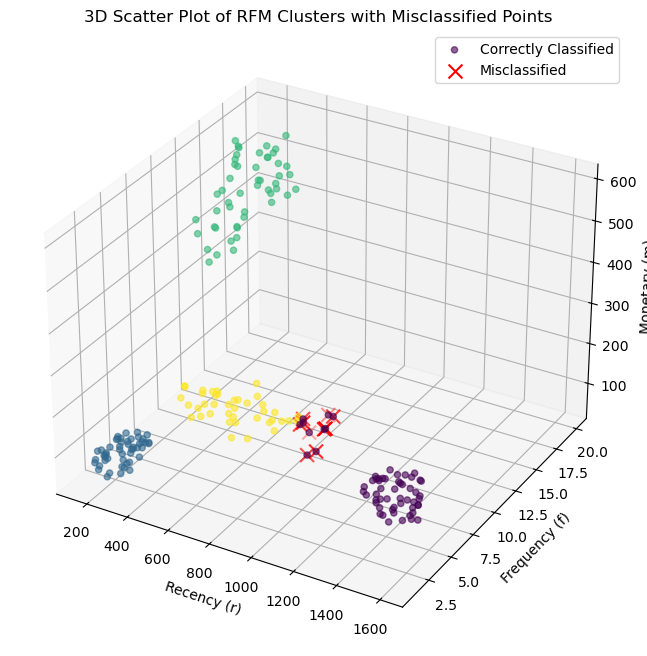

In [224]:
# Real (synthesized) class labels
real_labels = np.array([0] * 50 + [1] * 50 + [2] * 50 + [3] * 50)

# Identify misclassified points
misclassified_points = np.where(predicted_labels != real_labels)[0]

# Extract misclassified data points
misclassified_data = synthesized_data.iloc[misclassified_points]

# Plotting the clusters along with misclassified points
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot all points with cluster colors
scatter = ax.scatter(synthesized_data['r'], synthesized_data['f'], synthesized_data['m'], 
                     c=predicted_labels, cmap='viridis', marker='o', alpha=0.6, label="Correctly Classified")

# Highlight misclassified points
ax.scatter(misclassified_data['r'], misclassified_data['f'], misclassified_data['m'], 
           c='red', marker='x', s=100, label="Misclassified")

# Add labels and title
ax.set_title('3D Scatter Plot of RFM Clusters with Misclassified Points')
ax.set_xlabel('Recency (r)')
ax.set_ylabel('Frequency (f)')
ax.set_zlabel('Monetary (m)')

# Add legend
ax.legend(loc='best')

plt.show()


In [110]:
def compute_correlation_matrix(data):
    """
    Extract frequency columns (F___) from the dataset and compute the correlation matrix across all items.

    Parameters:
        data (pd.DataFrame): Input data containing frequency columns (F___).

    Returns:
        pd.DataFrame: Correlation matrix across all items.
    """
    # Extract frequency columns

    frequency_columns = [col for col in data.columns if col.startswith('F')]
    
    # Create a new matrix with only frequency columns
    frequency_matrix = data[frequency_columns]
    # Extract monetary columns
    monetary_columns = [col for col in data.columns if col.startswith('M')]
    
    # Create a new matrix with only frequency columns
    monetary_matrix = data[monetary_columns]
    
    # Compute the correlation matrix
    correlation_matrix = frequency_matrix.corr()
    
    return correlation_matrix, frequency_matrix, monetary_matrix

# Example usage:
# Assuming `df` is your DataFrame with frequency columns (F___)
# correlation_matrix = compute_correlation_matrix(df)
# tools.display_dataframe_to_user(name="Correlation Matrix of Frequency Columns", dataframe=correlation_matrix)


In [114]:
corr_0, F_matrix_0, M_matrix_0 = compute_correlation_matrix(filtered_data[filtered_data['Cluster']==0])
corr_1, F_matrix_1, M_matrix_1 = compute_correlation_matrix(filtered_data[filtered_data['Cluster']==1])
corr_2, F_matrix_2, M_matrix_2 = compute_correlation_matrix(filtered_data[filtered_data['Cluster']==2])
corr_3, F_matrix_3, M_matrix_3 = compute_correlation_matrix(filtered_data[filtered_data['Cluster']==3])

In [118]:
M_matrix_3

,Mfiction1,Mclassics3,Mcartoons5,Mlegends6,Mphilosophy7,Mreligion8,Mpsychology9,Mlinguistics10,Mart12,Mmusic14,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
14,0.0,0.0,0.000000,0.0,0.0,17.767380,0.0,0.000000,0.000000,90.319946,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,16.899994,0.0
20,0.0,0.0,0.000000,0.0,0.0,12.782295,0.0,0.000000,0.000000,0.000000,...,8.589699,0.000000,49.948090,0.0,0.0,0.000000,10.200272,0.000000,0.000000,0.0
21,0.0,0.0,15.067116,0.0,0.0,6.949997,0.0,0.000000,0.000000,5.989998,...,2.500000,10.123573,0.000000,0.0,0.0,14.949997,0.000000,1.950000,13.749992,0.0
27,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,39.899994,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,10.949997,24.899994,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32304,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,8.949997,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
32305,0.0,0.0,2.500000,0.0,0.0,0.000000,0.0,9.949997,24.799988,0.000000,...,2.000000,16.949997,6.949997,0.0,0.0,25.439987,0.000000,0.000000,0.000000,0.0
32306,0.0,0.0,18.899994,0.0,0.0,0.000000,0.0,9.899994,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,29.699982,0.0
32322,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,5.000000,8.399994,0.000000,0.0,0.0,0.000000,0.000000,0.000000,12.799995,0.0


In [6]:

def plot_correlation_heatmap(correlation_matrix):
    """
    Visualize a given correlation matrix using seaborn heatmap.

    Parameters:
        correlation_matrix (pd.DataFrame): Correlation matrix to visualize.
    """
    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

# Example usage:
# Assuming `correlation_matrix` is your precomputed correlation matrix
# plot_correlation_heatmap(correlation_matrix)


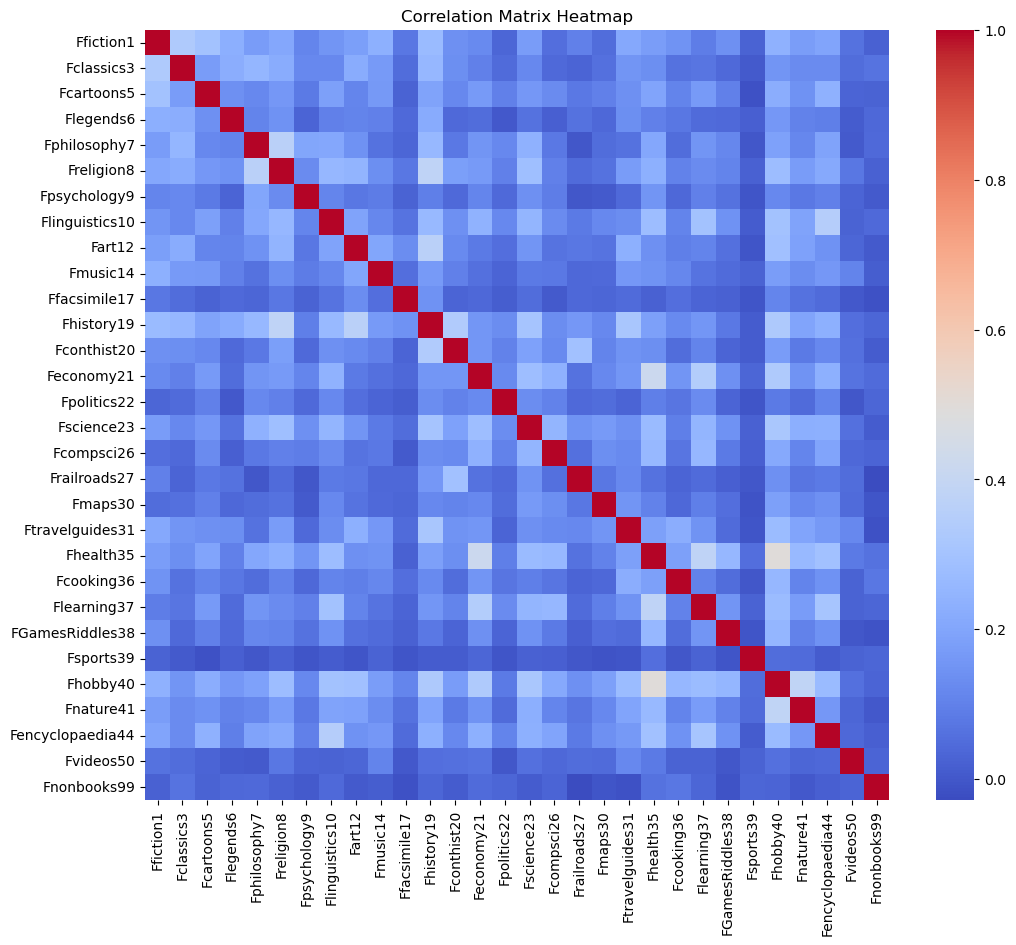

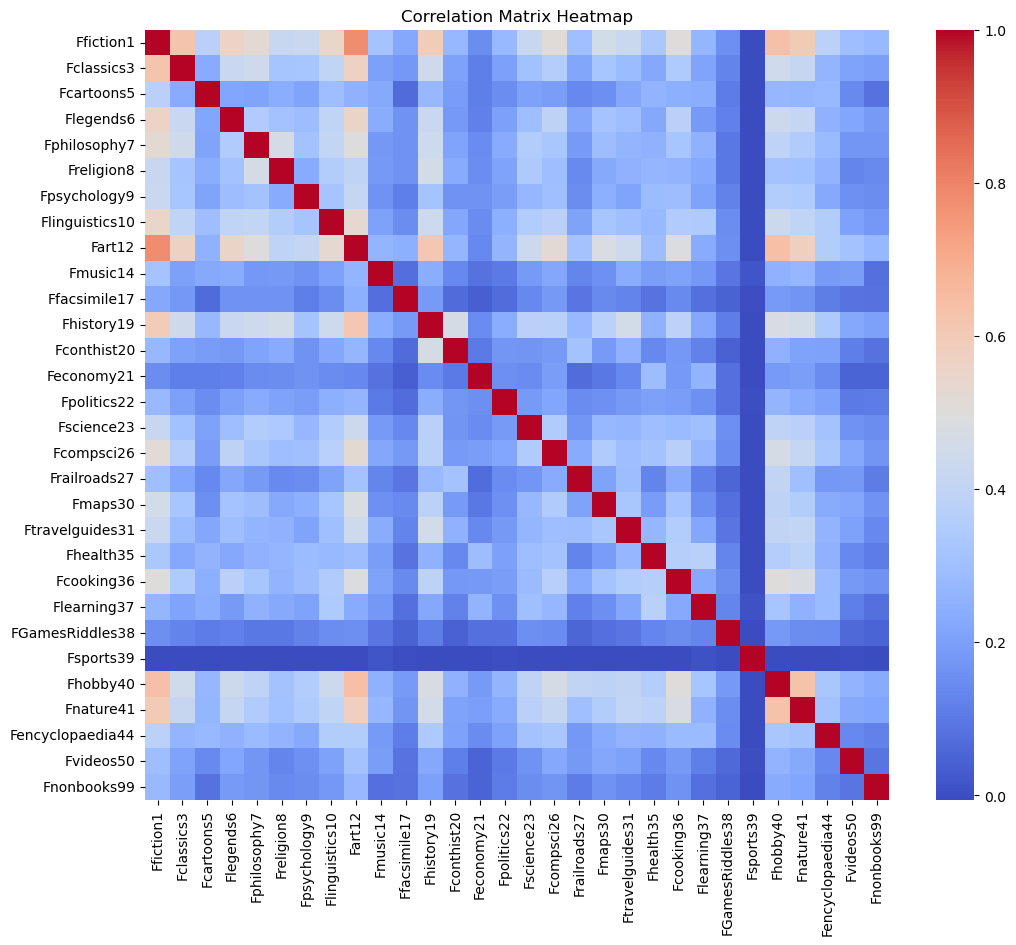

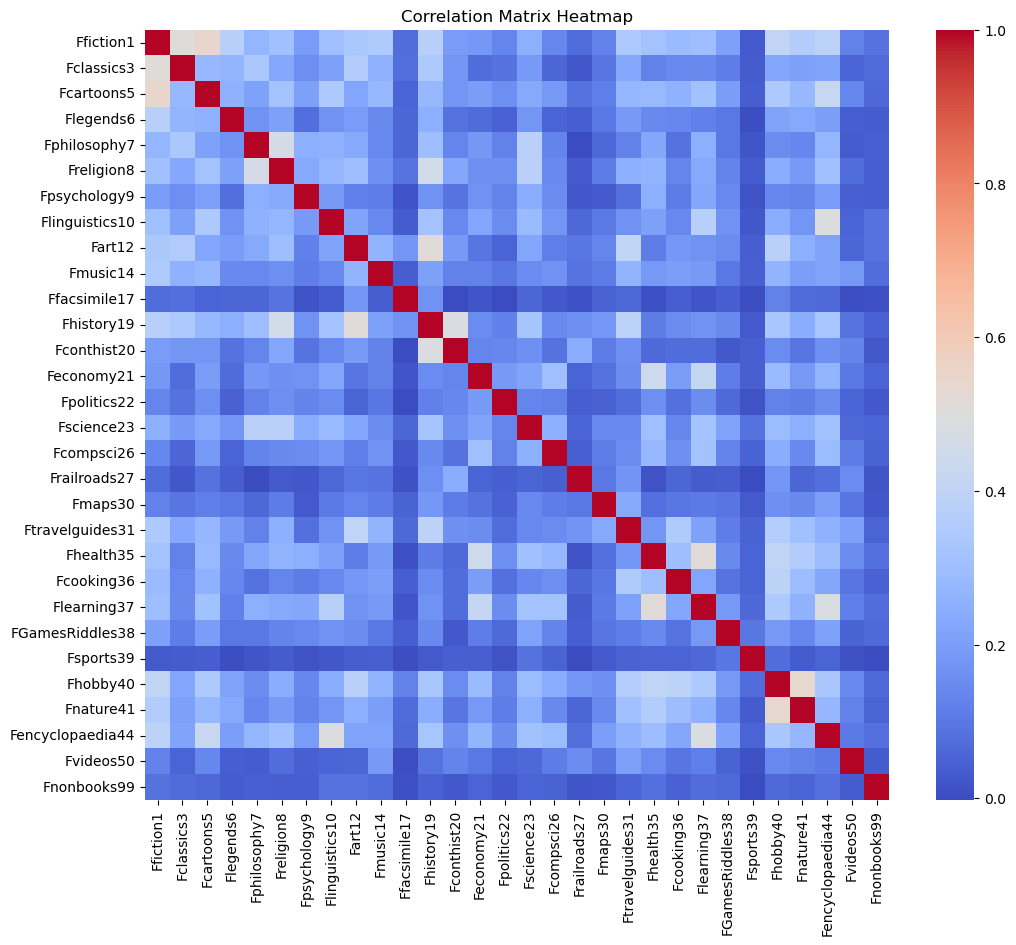

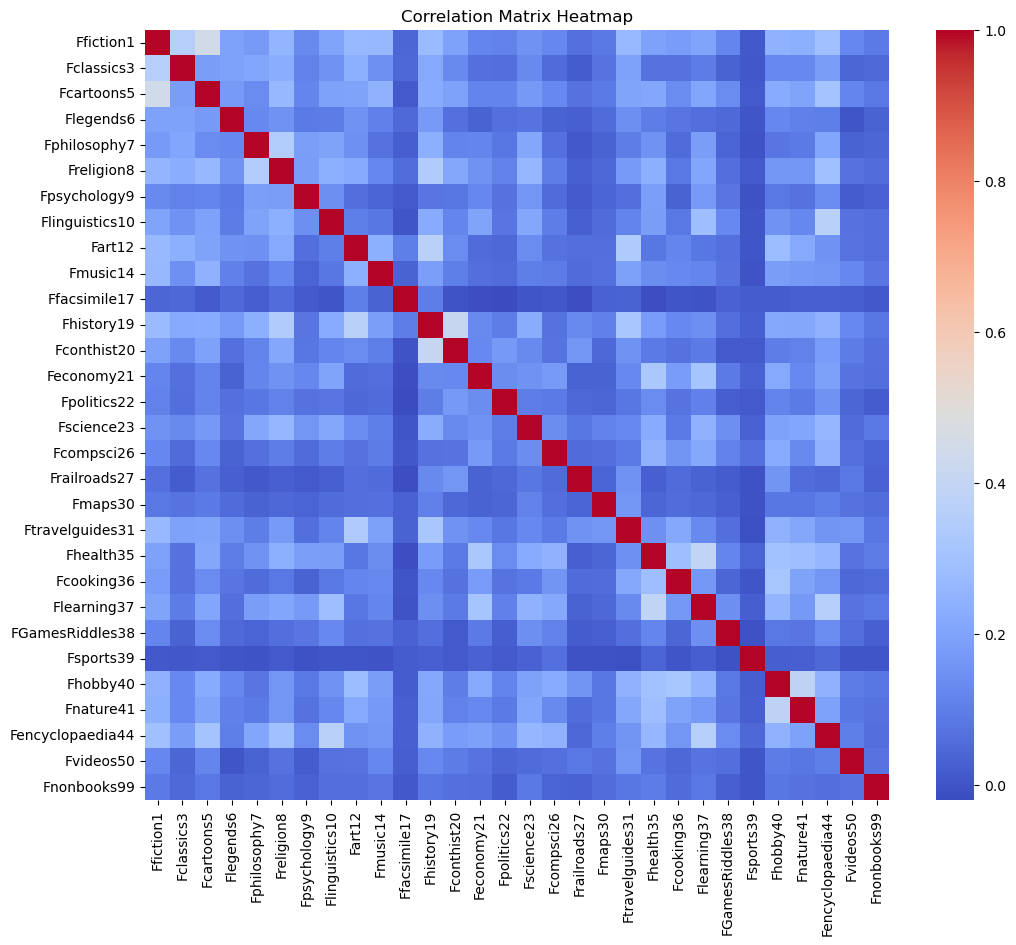

In [119]:
plot_correlation_heatmap(corr_0)
plot_correlation_heatmap(corr_1)
plot_correlation_heatmap(corr_2)
plot_correlation_heatmap(corr_3)

In [140]:
def get_top_k_combinations(correlation_matrix, top_k=20):
    """
    Extract the top K highest correlations from a correlation matrix, including their corresponding item pairs.

    Parameters:
        correlation_matrix (pd.DataFrame): Correlation matrix to analyze.
        top_k (int): Number of top correlations to extract.

    Returns:
        pd.DataFrame: A DataFrame containing the top K item combinations and their correlation values.
    """
    # Flatten the correlation matrix while keeping the indices
    corr_flat = correlation_matrix.unstack().reset_index()
    corr_flat.columns = ['Item1', 'Item2', 'Correlation/Conditional Prob']
    
    # Remove duplicate correlations and self-correlations
    corr_flat = corr_flat[corr_flat['Item1'] != corr_flat['Item2']]
    corr_flat = corr_flat.drop_duplicates(subset=['Correlation/Conditional Prob'], keep='first')
    
    # Get the top K correlations by absolute value
    top_combinations = corr_flat.nlargest(top_k, 'Correlation/Conditional Prob', 'all')
    
    return top_combinations

# Example usage:
# Assuming `correlation_matrix` is your precomputed correlation matrix
# top_combinations = get_top_k_combinations(correlation_matrix, top_k=20)
# tools.display_dataframe_to_user(name="Top K Correlations", dataframe=top_combinations)


In [141]:
combo_0 = get_top_k_combinations(corr_0, top_k=30)
combo_0


,Item1,Item2,Correlation/Conditional Prob
625,Fhealth35,Fhobby40,0.498287
410,Feconomy21,Fhealth35,0.420795
776,Fhobby40,Fnature41,0.383414
161,Freligion8,Fhistory19,0.379087
622,Fhealth35,Flearning37,0.378124
251,Fart12,Fhistory19,0.363884
125,Fphilosophy7,Freligion8,0.362520
237,Flinguistics10,Fencyclopaedia44,0.349661
412,Feconomy21,Flearning37,0.342542
342,Fhistory19,Fconthist20,0.333884


In [142]:
combo_1 = get_top_k_combinations(corr_1, top_k=30)
combo_1


,Item1,Item2,Correlation/Conditional Prob
8,Ffiction1,Fart12,0.779050
265,Fart12,Fhobby40,0.639207
25,Ffiction1,Fhobby40,0.638003
776,Fhobby40,Fnature41,0.627862
1,Ffiction1,Fclassics3,0.625414
251,Fart12,Fhistory19,0.611943
26,Ffiction1,Fnature41,0.596779
11,Ffiction1,Fhistory19,0.591659
266,Fart12,Fnature41,0.576126
38,Fclassics3,Fart12,0.565810


In [143]:
combo_2 = get_top_k_combinations(corr_2, top_k=30)
combo_2


,Item1,Item2,Correlation/Conditional Prob
2,Ffiction1,Fcartoons5,0.545896
776,Fhobby40,Fnature41,0.534435
251,Fart12,Fhistory19,0.511711
622,Fhealth35,Flearning37,0.510900
1,Ffiction1,Fclassics3,0.509870
237,Flinguistics10,Fencyclopaedia44,0.491306
342,Fhistory19,Fconthist20,0.484541
687,Flearning37,Fencyclopaedia44,0.483746
125,Fphilosophy7,Freligion8,0.464279
161,Freligion8,Fhistory19,0.458450


In [144]:
combo_3 = get_top_k_combinations(corr_3, top_k=30)
combo_3

,Item1,Item2,Correlation/Conditional Prob
2,Ffiction1,Fcartoons5,0.444968
342,Fhistory19,Fconthist20,0.410294
622,Fhealth35,Flearning37,0.388986
776,Fhobby40,Fnature41,0.380092
237,Flinguistics10,Fencyclopaedia44,0.365447
251,Fart12,Fhistory19,0.364923
687,Flearning37,Fencyclopaedia44,0.356794
1,Ffiction1,Fclassics3,0.355459
125,Fphilosophy7,Freligion8,0.343372
161,Freligion8,Fhistory19,0.340754


In [145]:
def compute_conditional_probability_matrix(data):
    """
    Compute the conditional probability matrix for frequency columns (F___) based on customer purchase data.

    Parameters:
        data (pd.DataFrame): Input data containing frequency columns (F___).

    Returns:
        pd.DataFrame: Conditional probability matrix where P(Item2|Item1) is the probability that a customer who purchased Item1 also purchased Item2.
    """
    # Extract frequency columns
    frequency_columns = [col for col in data.columns if col.startswith('F')]
    
    # Create a binary purchase matrix (1 if purchased, 0 otherwise)
    binary_matrix = (data[frequency_columns] > 0).astype(int)
    
    # Compute the conditional probability matrix
    conditional_prob_matrix = pd.DataFrame(index=frequency_columns, columns=frequency_columns, dtype=float)
    
    for item1 in frequency_columns:
        for item2 in frequency_columns:
            # P(Item2|Item1) = Number of customers who purchased both Item1 and Item2 / Number of customers who purchased Item1
            if binary_matrix[item1].sum() > 0:
                conditional_prob_matrix.loc[item1, item2] = (
                    (binary_matrix[item1] & binary_matrix[item2]).sum() / binary_matrix[item1].sum()
                )
            else:
                conditional_prob_matrix.loc[item1, item2] = 0.0
    
    return conditional_prob_matrix, binary_matrix

# Example usage:
# Assuming `df` is your dataset with frequency columns (F___)
# conditional_prob_matrix = compute_conditional_probability_matrix(df)
# tools.display_dataframe_to_user(name="Conditional Probability Matrix", dataframe=conditional_prob_matrix)


In [146]:
conp_0, binary_matrix_0 = compute_conditional_probability_matrix(filtered_data[filtered_data['Cluster']==0])
conp_1, binary_matrix_1 = compute_conditional_probability_matrix(filtered_data[filtered_data['Cluster']==1])
conp_2, binary_matrix_2 = compute_conditional_probability_matrix(filtered_data[filtered_data['Cluster']==2])
conp_3, binary_matrix_3 = compute_conditional_probability_matrix(filtered_data[filtered_data['Cluster']==3])
binary_matrix_0

,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,Fpsychology9,Flinguistics10,Fart12,Fmusic14,...,Fhealth35,Fcooking36,Flearning37,FGamesRiddles38,Fsports39,Fhobby40,Fnature41,Fencyclopaedia44,Fvideos50,Fnonbooks99
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
29,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
30433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


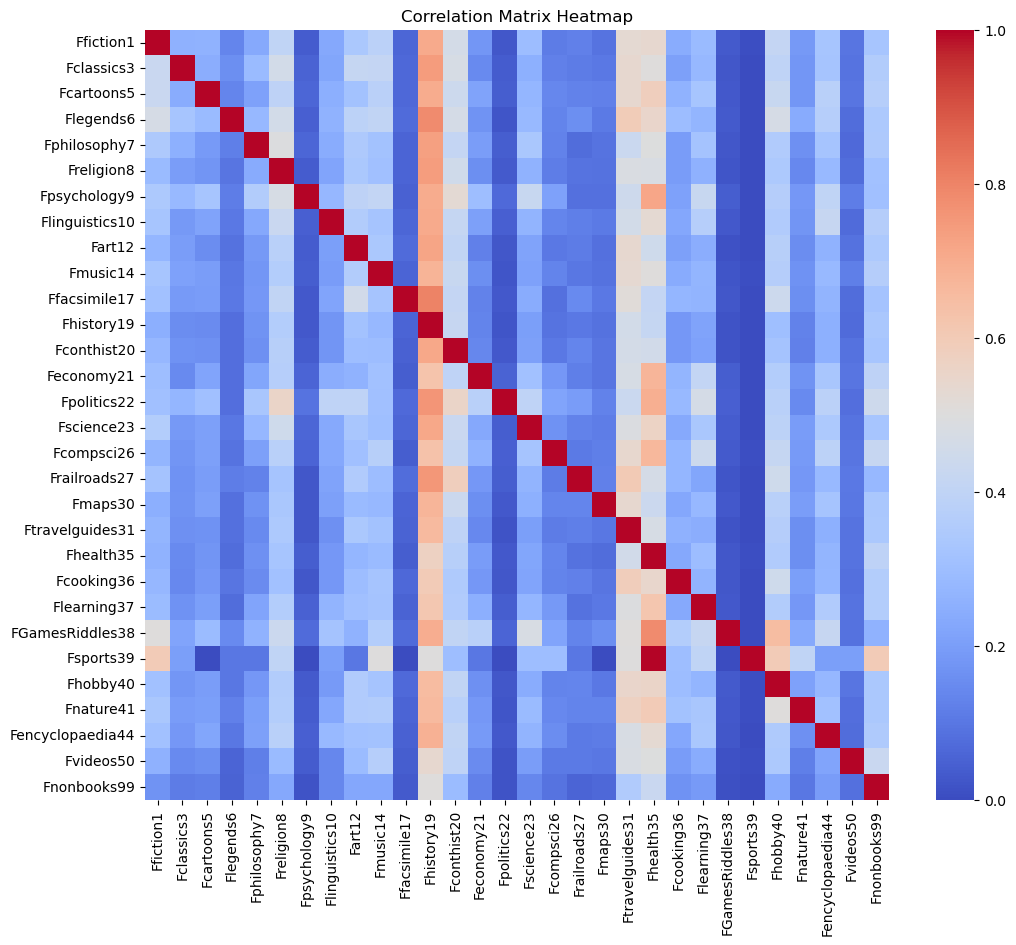

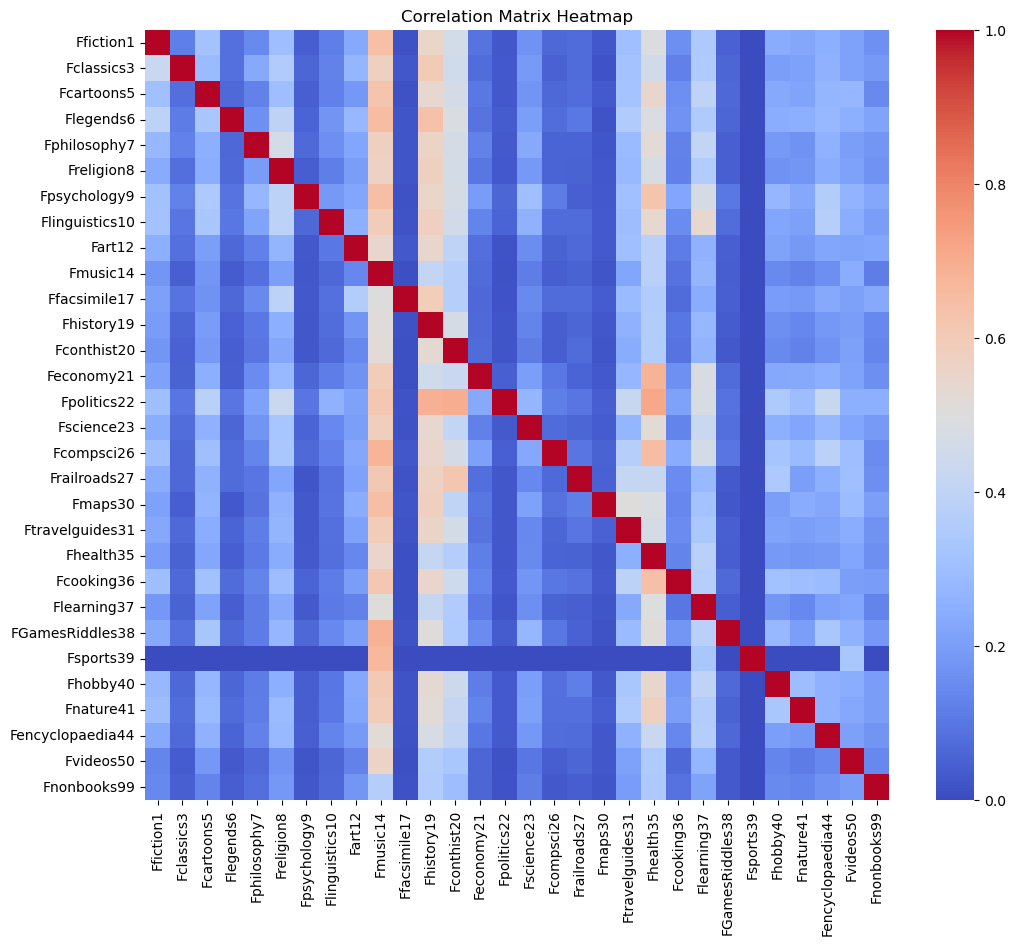

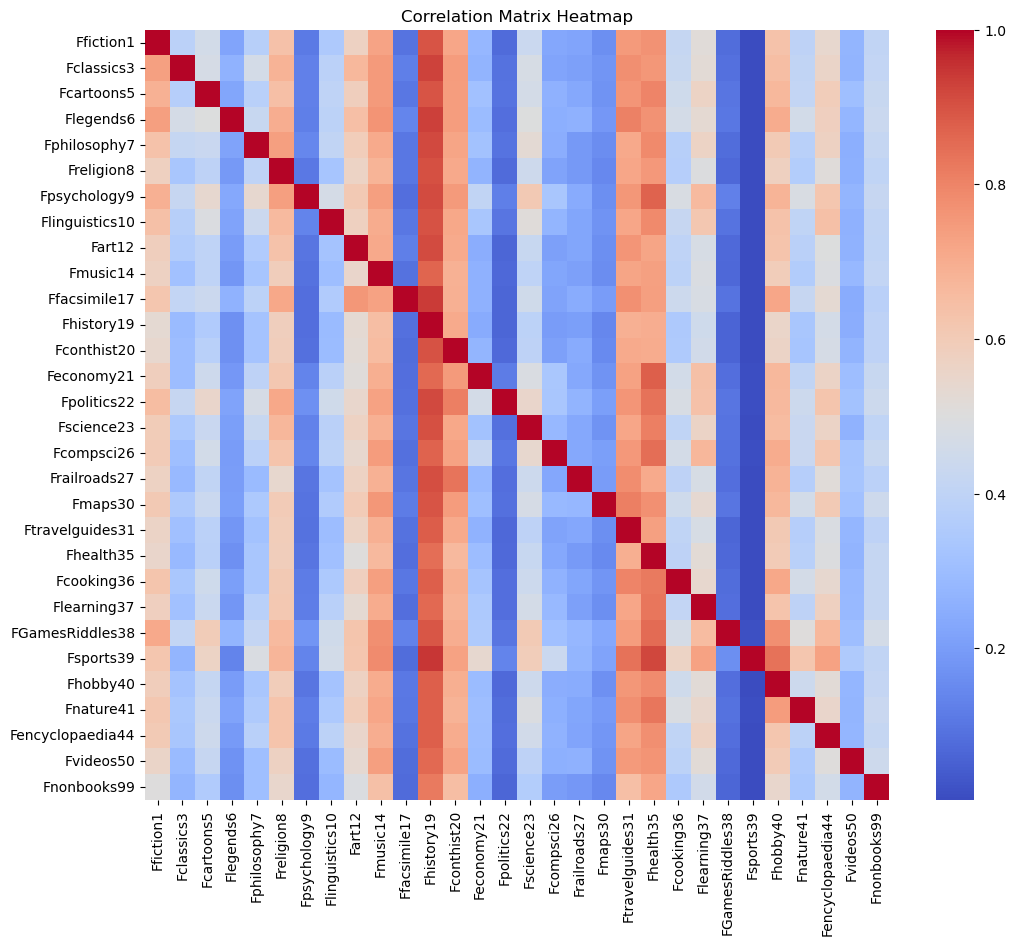

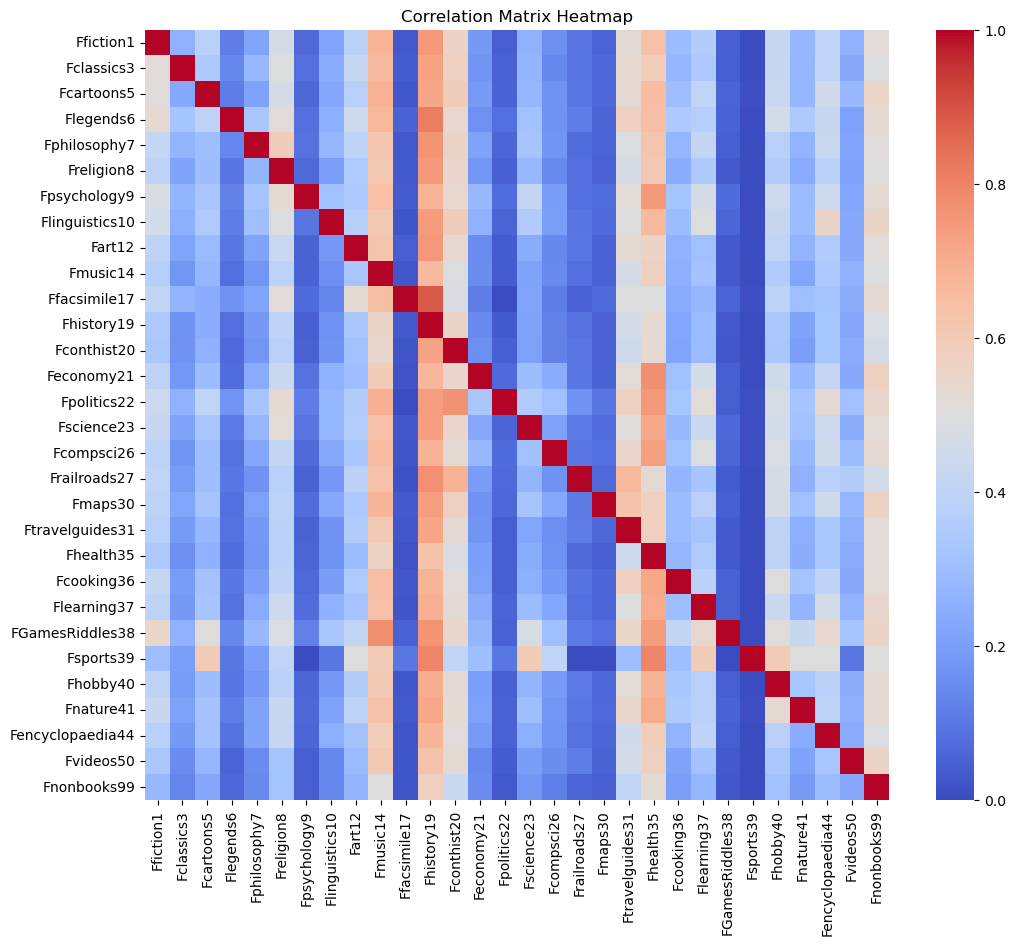

In [147]:
plot_correlation_heatmap(conp_0)
plot_correlation_heatmap(conp_1)
plot_correlation_heatmap(conp_2)
plot_correlation_heatmap(conp_3)

In [148]:
combo_p_0 = get_top_k_combinations(conp_0, top_k=30)
combo_p_0

,Item1,Item2,Correlation/Conditional Prob
624,Fhealth35,Fsports39,1.000000
340,Fhistory19,Ffacsimile17,0.802817
333,Fhistory19,Flegends6,0.784768
623,Fhealth35,FGamesRiddles38,0.782609
344,Fhistory19,Fpolitics22,0.761364
347,Fhistory19,Frailroads27,0.755396
331,Fhistory19,Fclassics3,0.742857
335,Fhistory19,Freligion8,0.740665
334,Fhistory19,Fphilosophy7,0.730606
338,Fhistory19,Fart12,0.721844


In [149]:
combo_p_1 = get_top_k_combinations(conp_1, top_k=30)
combo_p_1

,Item1,Item2,Correlation/Conditional Prob
614,Fhealth35,Fpolitics22,0.712000
374,Fconthist20,Fpolitics22,0.696000
344,Fhistory19,Fpolitics22,0.688000
293,Fmusic14,FGamesRiddles38,0.686275
613,Fhealth35,Feconomy21,0.682663
286,Fmusic14,Fcompsci26,0.678899
294,Fmusic14,Fsports39,0.666667
616,Fhealth35,Fcompsci26,0.651376
273,Fmusic14,Flegends6,0.649068
276,Fmusic14,Fpsychology9,0.647959


In [150]:
combo_p_2 = get_top_k_combinations(conp_2, top_k=30)
combo_p_2

,Item1,Item2,Correlation/Conditional Prob
354,Fhistory19,Fsports39,0.945946
340,Fhistory19,Ffacsimile17,0.941520
333,Fhistory19,Flegends6,0.930929
331,Fhistory19,Fclassics3,0.926198
624,Fhealth35,Fsports39,0.918919
334,Fhistory19,Fphilosophy7,0.917442
344,Fhistory19,Fpolitics22,0.916179
338,Fhistory19,Fart12,0.911806
336,Fhistory19,Fpsychology9,0.911337
347,Fhistory19,Frailroads27,0.907407


In [155]:
combo_p_3 = get_top_k_combinations(conp_3, top_k=900)
combo_p_3

,Item1,Item2,Correlation/Conditional Prob
340,Fhistory19,Ffacsimile17,0.884892
333,Fhistory19,Flegends6,0.814727
354,Fhistory19,Fsports39,0.800000
293,Fmusic14,FGamesRiddles38,0.776398
613,Fhealth35,Feconomy21,0.774542
...,...,...,...
732,Fsports39,Fconthist20,0.001228
727,Fsports39,Flinguistics10,0.001087
739,Fsports39,Ftravelguides31,0.001086
748,Fsports39,Fvideos50,0.000671
